## Apprentissage semi-supervisée

* Importer les librairies.

In [53]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, load_digits, load_iris, fetch_california_housing, fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

* Générer des données étiquetées et non-étiquetées.

In [54]:
X, y = make_blobs(n_samples=1000, cluster_std=2)
x_min, x_max = X[:,0].min()-2, X[:,0].max()+2
y_min, y_max = X[:,1].min()-2, X[:,1].max()+2

X_train = X[:500]
y_train = y[:500]

# La majorité des données est non-étiquetées
y_train[np.random.choice(500, size=497, replace=False)] = -1

# Ajouter du bruit
X_train[y_train != -1] += 2

X_test = X[500:]
y_test = y[500:]

X_train.shape

(500, 2)

* Afficher Les données.

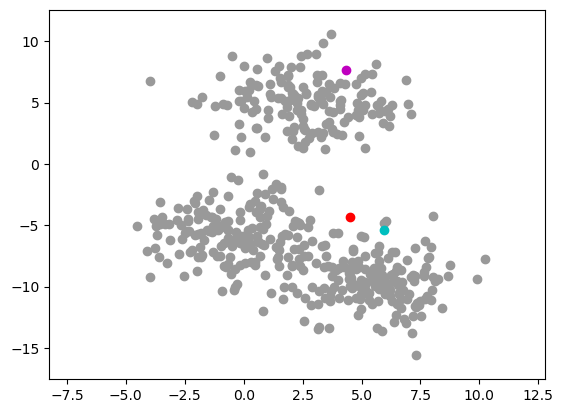

In [55]:
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='0.6')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='c')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='m')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

* Apprentissage semi-supervisé et prédiction avec l'algorithme Label Propagation

In [56]:
print("Label Propagation (sklearn): ")
#%timeit LabelPropagation().fit(X_train, y_train)
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train[y_train != -1], y_train[y_train != -1])
y_pred = label_prop_model.predict(X_train)


Label Propagation (sklearn): 


* Afficher et analyser le résultat de la prédiction.

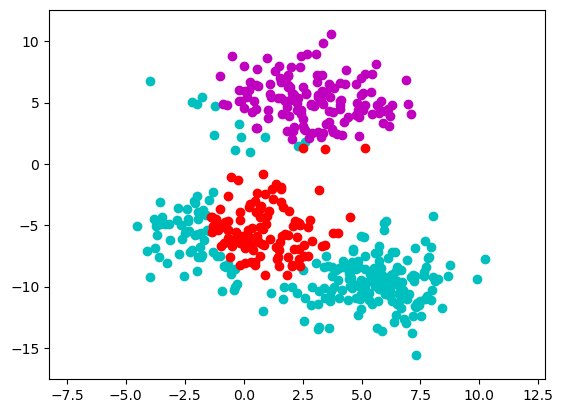

In [57]:
plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], color='c')
plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], color='m')
plt.scatter(X_train[y_pred == 2, 0], X_train[y_pred == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

* Modifier les paramètres de l'algorithme afin d'améliorer la prédiction.

Label Propagation (sklearn): 


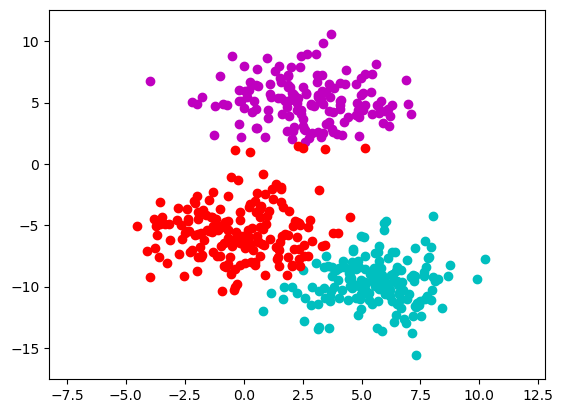

In [58]:
print("Label Propagation (sklearn): ")
#%timeit LabelPropagation().fit(X_train, y_train)
label_prop_model = LabelPropagation(kernel='rbf', gamma=0.1)
label_prop_model.fit(X_train[y_train != -1], y_train[y_train != -1])
y_pred = label_prop_model.predict(X_train)

plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], color='c')
plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], color='m')
plt.scatter(X_train[y_pred == 2, 0], X_train[y_pred == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

**Exercice 1**

1. Appliquer de la même manière l'algorithme d'apprentissage semi-supervisé `Label Propagation` sur le jeu de données digits.

2. Appliquer aussi l'algorithme `Label Spreading` sur le même jeu de données

3. Comparer le résultat avec un algorithme d'apprentissage supervisé.

In [59]:
x, y = load_digits(return_X_y=True)
rng = np.random.RandomState(2)
indices = np.arange(len(y.data))
rng.shuffle(indices)
x.shape, y.shape

((1797, 64), (1797,))

In [60]:
x = x[indices[:340]]
y = y[indices[:340]]

n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

In [61]:
y_train = np.copy(y)
y_train[unlabeled_set] = -1

In [62]:
lp_model = LabelPropagation(gamma=0.25, max_iter=20)
lp_model.fit(x, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

In [63]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.67      0.89      0.77        37
           2       0.86      0.43      0.57        28
           3       0.95      0.60      0.74        35
           4       0.76      0.92      0.83        24
           5       0.82      0.91      0.86        34
           6       0.78      1.00      0.88        25
           7       0.82      0.94      0.88        35
           8       0.91      0.68      0.78        31
           9       0.70      0.79      0.75        24

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.80       300
weighted avg       0.83      0.81      0.80       300



In [64]:
lp_model = LabelSpreading(gamma=0.25, max_iter=20)
lp_model.fit(x, y_train)
y_pred = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

In [65]:
print(classification_report(true_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [66]:
knn = KNeighborsClassifier()
knn.fit(x[:n_labeled_points], y[:n_labeled_points])
y_pred_knn = knn.predict(x[unlabeled_set])

In [67]:
print(classification_report(true_labels, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.45      0.65      0.53        37
           2       0.62      0.18      0.28        28
           3       0.00      0.00      0.00        35
           4       0.62      1.00      0.76        24
           5       0.59      0.85      0.70        34
           6       0.54      1.00      0.70        25
           7       0.89      0.69      0.77        35
           8       0.00      0.00      0.00        31
           9       0.32      0.71      0.44        24

    accuracy                           0.57       300
   macro avg       0.50      0.59      0.51       300
weighted avg       0.49      0.57      0.50       300



Nous pouvons constater que KNN est moins que les deux algorithmes d'apprentissage semi supervisé.
Notons que la classe qu'il a le moins reconnu et "8" et celle la plus reconnu est le "0" ce qui peux
se comprendre car ces deux symboles ont une géométrie assez proche. A l'inverse les rapports de classification
nous montrent que LabelPropagation et LabelSpreading ont eux une répartition tout à fait bonne.

## Apprentissage en ligne

On s'intéresse ici à l'apprentissage en ligne par descente de gradient stochastique. En particulier on s'intéresse à la  classification et à la régression en ligne utlisant les fonctions `SGDClassifier` et `SGDRegressor` de `sklearn`.

**Exercice 2**

1. Importer les modules `SGDClassifier` et `SGDRegressor` et les jeux de données `iris` pour la classification et `boston` pour la régression.

2. Diviser les données  en données d'apprentissage et données test. 80% des données est utilisé pour l'apprentissage et les 20% restant pour le test.

3. Créer les modèles `SGDClassifier` avec les fonctions de perte hinge et logistqiue et `SGDRegressor`avec les fonctions de perte moindres carrés et huber.

4. Normaliser les données utilisant la fonction `StandardScaler()`.

5. Apprendre les deux classifieurs et comparer leurs performances sur les données test. Analyser les résultats.

6. Apprendre les deux régresseurs et comparer leurs performances sur les données test. Analyser les résultats.

7. Apprendre un SVM et un SGDClassifier (hinge loss) sur le jeu de données `fetch_covtype` ou  `fetch_20newsgroups`. Utiliser 70% des données pour l'apprentissage et le reste pour la phase de test. Comparer les performances et les temps de calcul des deux classifieurs.

In [68]:
x_iris, y_iris = load_iris(return_X_y=True)
x_fch, y_fch = fetch_california_housing(return_X_y=True)

x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(
    x_iris, y_iris, test_size=0.2, shuffle=True, random_state=42
)

x_train_fch, x_test_fch, y_train_fch, y_test_fch = train_test_split(
    x_fch, y_fch, test_size=0.2, shuffle=True, random_state=42
)

In [69]:
sgd_clf_hinge = SGDClassifier(loss='hinge', random_state=42)
sgd_clf_log = SGDClassifier(loss='log_loss', random_state=42)

sgd_reg_squared = SGDRegressor(loss='squared_error', random_state=42)
sgd_reg_huber = SGDRegressor(loss='huber', random_state=42)

In [70]:
scaler_iris = StandardScaler()
x_train_iris = scaler_iris.fit_transform(x_train_iris)
x_test_iris = scaler_iris.transform(x_test_iris)

scaler_fch = StandardScaler()
x_train_fch = scaler_fch.fit_transform(x_train_fch)
x_test_fch = scaler_fch.transform(x_test_fch)

In [71]:
sgd_clf_hinge.fit(x_train_iris, y_train_iris)
sgd_clf_log.fit(x_train_iris, y_train_iris)

y_pred_hinge = sgd_clf_hinge.predict(x_test_iris)
y_pred_log = sgd_clf_log.predict(x_test_iris)

In [72]:
print("SGDClassifier with hinge loss:")
print(classification_report(y_test_iris, y_pred_hinge))

SGDClassifier with hinge loss:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [73]:
print("SGDClassifier with logistic loss:")
print(classification_report(y_test_iris, y_pred_log))

SGDClassifier with logistic loss:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [74]:
sgd_reg_squared.fit(x_train_fch, y_train_fch)
sgd_reg_huber.fit(x_train_fch, y_train_fch)
y_pred_squared = sgd_reg_squared.predict(x_test_fch)
y_pred_huber = sgd_reg_huber.predict(x_test_fch)

In [75]:
print("SGDRegressor with squared error loss:")
print("MSE:", mean_squared_error(y_test_fch, y_pred_squared))
print("R2 Score:", r2_score(y_test_fch, y_pred_squared))

print("\nSGDRegressor with Huber loss:")
print("MSE", mean_squared_error(y_test_fch, y_pred_huber))
print("R2 Score:", r2_score(y_test_fch, y_pred_huber))

SGDRegressor with squared error loss:
MSE: 0.5505987775857769
R2 Score: 0.5798267665069696

SGDRegressor with Huber loss:
MSE 0.5914438672832667
R2 Score: 0.5486570398218545


In [76]:
x, y = fetch_20newsgroups(return_X_y=True, subset='all')
len(x), len(y)

(18846, 18846)

In [77]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    x, y, train_size=0.7, shuffle=True
)
len(X_train_raw), len(y_train)

(13192, 13192)

In [78]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [79]:
start_time = time.time()
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_time = time.time() - start_time
print(f"Process time: {svm_time}")

Process time: 1.2653520107269287


In [80]:
start_time = time.time()
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_time = time.time() - start_time
print(f"Process time: {sgd_time}")

Process time: 0.5917203426361084


In [81]:
y_pred_svm = svm_clf.predict(X_test)
print("SVM classification report:")
print(classification_report(y_test, y_pred_svm))

SVM classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       232
           1       0.85      0.84      0.85       294
           2       0.87      0.88      0.88       289
           3       0.83      0.82      0.83       308
           4       0.90      0.92      0.91       284
           5       0.92      0.92      0.92       296
           6       0.88      0.90      0.89       307
           7       0.95      0.95      0.95       300
           8       0.97      0.98      0.97       311
           9       0.96      0.98      0.97       299
          10       0.97      0.98      0.97       290
          11       0.98      0.95      0.97       280
          12       0.90      0.89      0.90       294
          13       0.95      0.94      0.95       292
          14       0.96      0.98      0.97       304
          15       0.95      0.98      0.96       289
          16       0.94      0.97      0.95       294


In [82]:
y_pred_sgd = sgd_clf.predict(X_test)
print("SGDClassifier classification report :")
print(classification_report(y_test, y_pred_sgd))

SGDClassifier classification report :
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       232
           1       0.85      0.83      0.84       294
           2       0.87      0.86      0.87       289
           3       0.83      0.83      0.83       308
           4       0.89      0.90      0.89       284
           5       0.91      0.91      0.91       296
           6       0.88      0.90      0.89       307
           7       0.94      0.96      0.95       300
           8       0.97      0.98      0.97       311
           9       0.97      0.96      0.96       299
          10       0.97      0.98      0.97       290
          11       0.96      0.96      0.96       280
          12       0.91      0.88      0.89       294
          13       0.96      0.95      0.95       292
          14       0.94      0.98      0.96       304
          15       0.91      0.97      0.94       289
          16       0.93      0.97      0.95

Le classifieur SGD semble plus rapide que le SVM à noyau linaire, de plus ce dernier est aussi moins rapide.